
Pair Trading Strategy
*   https://israeldi.github.io/coursework/EECS545/545_Final_Project.pdf
*   https://anonymous.4open.science/r/cc3047bb-b0e1-4442-82f8-43501909704a/Code/.ipynb_checkpoints/Cloned%20from%20Pairs%20Trading%20with%20Machine%20Learning-checkpoint.ipynb

Clustering
*   https://algotrading101.com/learn/cluster-analysis-guide/

Backtesting
*   https://www.quantstart.com/articles/Backtesting-An-Intraday-Mean-Reversion-Pairs-Strategy-Between-SPY-And-IWM/

*   List item
*   List item


*   List item


*   List item






In [1]:
!pip install yahoo_fin
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing

from statsmodels.tsa.stattools import coint

from scipy import stats
import yahoo_fin.stock_info as si

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=c3110f3e7e12d9681489cdafd4c9c21711349444e775ba4eda6b24bd2e0d8530
  Stored in directory: c:\users\ngche\appdata\local\pip\cache\wheels\75\78\21\68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24581 sha256=30d91dc610c76bb32c272682fbd9f393f4a8eb6b1e5fc4d3e938a76316373bbd
  Stored in directory: c:\users\ngche\appdata\local\pip\cache\wheels\e5\33\1f\68392720485b3ecf125a69e700baaab7624616deedea2fa6e2
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=89666edbd9a7de499f46f51b086c81e026ff00ab63a95dc7ca1c35a5b17e5971
  Stored in directory: c:\users\ngche\appdata\local\pip\cache\wheels\83\63\2f\117884c3b19d46b64d3d61690333aa80c88dc14050e269c546
Successfully built bs4 parse sgmllib3k


In [2]:
#!pip install yahoo_fin
from datetime import datetime

sp500_list = si.tickers_sp500()
sp500_historical = {}
for ticker in sp500_list:
    sp500_historical[ticker] = si.get_data(ticker, start_date="01/01/2019", index_as_date = False, interval="1d")
sp500_historical


data = pd.concat(sp500_historical)
data.reset_index(drop=True, inplace=True)
data = data.pivot(columns='ticker', index='date', values = 'adjclose')

In [3]:
data = pd.concat(sp500_historical)
data.reset_index(drop=True, inplace=True)
data = data.pivot(columns='ticker', index='date', values = 'adjclose')
print(data.shape)

(1058, 503)


In [4]:
# train test split
test = data.iloc[600:,:]
data = data.iloc[:600,:]
print(test.shape)
print(data.shape)

(458, 503)
(600, 503)


In [6]:
from sklearn.decomposition import PCA
returns = data.pct_change()
returns = returns.iloc[1:,:].dropna(axis=1)
returns.shape

print(returns)

N_PRIN_COMPONENTS = 50
pca = PCA(n_components = N_PRIN_COMPONENTS)
pca.fit(returns)
pca.components_.T.shape


ticker             A       AAL       AAP      AAPL      ABBV       ABC  \
date                                                                     
2019-01-03 -0.036840 -0.074507  0.031218 -0.099608 -0.032948 -0.014506   
2019-01-04  0.034614  0.065868 -0.024808  0.042689  0.032217  0.011585   
2019-01-07  0.021234  0.028402  0.014672 -0.002225  0.014595  0.007141   
2019-01-08  0.014660 -0.016085 -0.006951  0.019063  0.004648  0.010702   
2019-01-09  0.020934  0.030845  0.027559  0.016982 -0.032823  0.010192   
...              ...       ...       ...       ...       ...       ...   
2021-05-13  0.010728  0.021676  0.013430  0.017920  0.014266 -0.005246   
2021-05-14  0.008691  0.056106 -0.008264  0.019845 -0.001458 -0.021005   
2021-05-17 -0.007930  0.042411  0.008727 -0.009259  0.003951  0.013646   
2021-05-18 -0.010453  0.008994 -0.022192 -0.011246  0.002738 -0.009821   
2021-05-19  0.011340 -0.025042 -0.027295 -0.001281 -0.011603  0.015306   

ticker           ABT      ACGL       

In [ ]:
X = preprocessing.StandardScaler().fit_transform(pca.components_.T)
print (X.shape)
clf = DBSCAN(eps=3.5, min_samples=3)
print (clf)

clf.fit(X)
labels = clf.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print ("\nClusters discovered: %d" % n_clusters_)

clustered = clf.labels_



(496, 50)
DBSCAN(eps=3.5, min_samples=3)

Clusters discovered: 12


(12, 3, 3.5)
[(0, 3, 1.0), (0, 3, 1.5), (0, 3, 2.0), (0, 4, 1.0), (0, 4, 1.5), (0, 4, 2.0), (0, 5, 1.0), (0, 5, 1.5), (0, 5, 2.0), (0, 6, 1.0), (0, 6, 1.5), (0, 6, 2.0), (0, 7, 1.0), (0, 7, 1.5), (0, 7, 2.0), (0, 8, 1.0), (0, 8, 1.5), (0, 8, 2.0), (0, 8, 2.5), (0, 9, 1.0), (0, 9, 1.5), (0, 9, 2.0), (0, 9, 2.5), (0, 10, 1.0), (0, 10, 1.5), (0, 10, 2.0), (0, 10, 2.5), (0, 11, 1.0), (0, 11, 1.5), (0, 11, 2.0), (0, 11, 2.5), (0, 12, 1.0), (0, 12, 1.5), (0, 12, 2.0), (0, 12, 2.5), (0, 13, 1.0), (0, 13, 1.5), (0, 13, 2.0), (0, 13, 2.5), (0, 13, 3.0), (0, 14, 1.0), (0, 14, 1.5), (0, 14, 2.0), (0, 14, 2.5), (0, 14, 3.0), (0, 15, 1.0), (0, 15, 1.5), (0, 15, 2.0), (0, 15, 2.5), (0, 15, 3.0), (0, 16, 1.0), (0, 16, 1.5), (0, 16, 2.0), (0, 16, 2.5), (0, 16, 3.0), (0, 17, 1.0), (0, 17, 1.5), (0, 17, 2.0), (0, 17, 2.5), (0, 17, 3.0), (0, 18, 1.0), (0, 18, 1.5), (0, 18, 2.0), (0, 18, 2.5), (0, 18, 3.0), (0, 19, 1.0), (0, 19, 1.5), (0, 19, 2.0), (0, 19, 2.5), (0, 19, 3.0), (0, 20, 1.0), (0, 20, 1.5), (

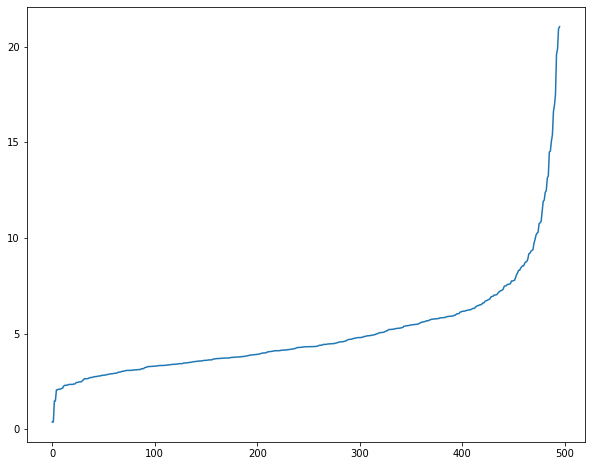

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

nn = NearestNeighbors(n_neighbors=3).fit(X)
distances, indices = nn.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

min_samples = range(3,3)
eps = np.arange(1,1, 0.5)

output = []
cluster_count = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(X).labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        cluster_count.append((n_clusters_,ms,ep))
        if labels.all(-1):
          continue
        score = silhouette_score(X, labels)
        output.append((ms, ep, score))
print(max(cluster_count))
print(sorted(cluster_count))
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

In [ ]:
# the initial dimensionality of the search was
ticker_count = len(returns.columns)
print ("Total pairs possible in universe: %d " % (ticker_count*(ticker_count-1)/2))

Total pairs possible in universe: 122760 


In [ ]:
clustered_series = pd.Series(index=returns.columns, data=clustered.flatten())
clustered_series_all = pd.Series(index=returns.columns, data=clustered.flatten())
clustered_series = clustered_series[clustered_series != -1]
CLUSTER_SIZE_LIMIT = 50
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts>1) & (counts<=CLUSTER_SIZE_LIMIT)]
print ("Clusters formed: %d" % len(ticker_count_reduced))
print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())

Clusters formed: 12
Pairs to evaluate: 1772


In [ ]:
X_tsne = TSNE(learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


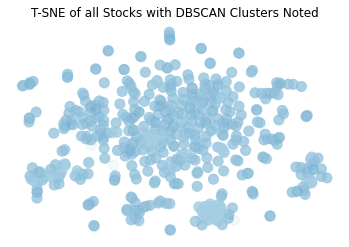

In [ ]:
plt.figure(1, facecolor='white')
plt.clf()
plt.axis('off')

plt.scatter(
    X_tsne[(labels!=-1), 0],
    X_tsne[(labels!=-1), 1],
    s=100,
    alpha=0.85,
    c=labels[labels!=-1],
    cmap=cm.Paired
)

plt.scatter(
    X_tsne[(clustered_series_all==-1).values, 0],
    X_tsne[(clustered_series_all==-1).values, 1],
    s=100,
    alpha=0.05
)

plt.title('T-SNE of all Stocks with DBSCAN Clusters Noted');


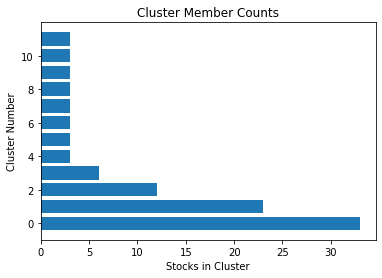

In [ ]:
plt.barh(
    range(len(clustered_series.value_counts())),
    clustered_series.value_counts()
)
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number');

In [ ]:
data.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,ACN,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,63.937458,31.963156,150.281799,38.168354,73.500519,70.018867,309.959991,65.186653,26.190001,133.159988,...,43.578987,56.254143,36.629124,63.551472,85.538933,96.544250,156.240005,37.291225,82.404877,2510.030029
2019-01-03,61.582012,29.581665,154.973389,34.366501,71.078773,69.003159,302.290009,62.110222,25.780001,128.613632,...,43.407272,55.390434,36.648449,61.372883,83.387375,94.797989,146.880005,37.084946,79.556602,2447.889893
2019-01-04,63.713585,31.530159,151.128769,35.833576,73.368713,69.802559,313.440002,63.882912,26.389999,133.614609,...,43.832043,57.432663,37.711838,63.962326,85.557663,98.035645,152.970001,38.223949,82.678017,2531.939941
2019-01-07,65.066498,32.425678,153.346069,35.753826,74.439560,70.301041,314.799988,64.839615,26.330000,134.078735,...,43.642262,57.731319,38.388550,63.016361,85.464081,98.073402,155.289993,38.376419,83.175461,2549.689941
2019-01-08,66.020355,31.904110,152.280212,36.435402,74.785522,71.053413,318.420013,64.061134,26.430000,137.469543,...,44.148354,58.151073,38.127533,63.608799,85.295715,95.874054,156.330002,38.726192,84.414253,2574.409912


['LHX', 'LMT', 'NOC']
ticker             LHX         LMT         NOC
date                                          
2019-01-02  124.629211  239.452042  231.701782
2019-01-03  121.736755  233.436981  225.635773
2019-01-04  124.423309  239.732407  233.140717
2019-01-07  125.237663  242.482117  234.955780
2019-01-08  125.190880  244.101212  236.018478
...                ...         ...         ...
2021-05-13  208.777405  371.863892  361.254913
2021-05-14  211.121674  374.750427  362.768036
2021-05-17  212.152786  375.076508  363.998047
2021-05-18  209.059464  371.336456  359.849182
2021-05-19  208.495300  369.725403  362.074890

[600 rows x 3 columns]
['GOOG', 'GOOGL', 'META']
ticker            GOOG       GOOGL        META
date                                          
2019-01-02   52.292500   52.734001  135.679993
2019-01-03   50.803001   51.273499  131.740005
2019-01-04   53.535500   53.903500  137.949997
2019-01-07   53.419498   53.796001  138.050003
2019-01-08   53.813999   54.268501 

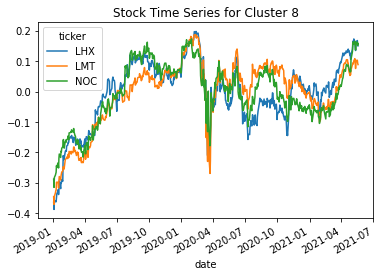

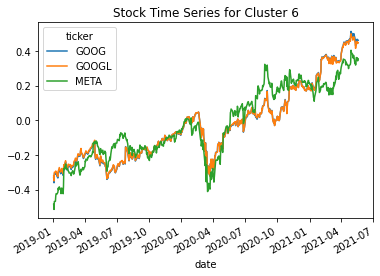

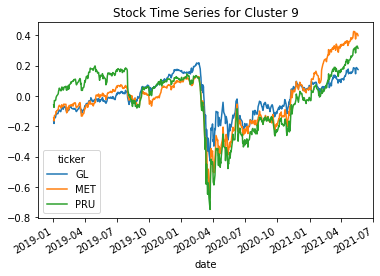

In [ ]:
# get the number of stocks in each cluster
counts = clustered_series.value_counts()

# let's visualize some clusters
cluster_vis_list = list(counts[(counts<20) & (counts>1)].index)[::-1]
# data = data.astype(Timestamp)

# plot a handful of the smallest clusters
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 3)]:
    tickers = list(clustered_series[clustered_series==clust].index)
    print(tickers)
    print(data[tickers])
    #for i in range(len(tickers)):
      # print(type(tickers[0]))
      #tickers[i] = tickers[i].to_pydatetime()
    means = np.log(data[tickers].mean())
    data1 = np.log(data[tickers]).sub(means)
    data1.plot(title='Stock Time Series for Cluster %d' % clust)

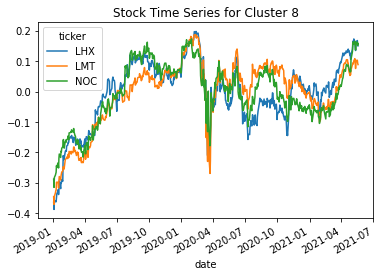

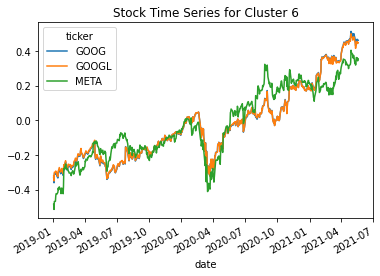

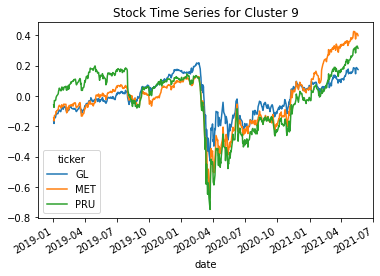

In [ ]:
# get the number of stocks in each cluster
counts = clustered_series.value_counts()

# let's visualize some clusters
cluster_vis_list = list(counts[(counts<20) & (counts>1)].index)[::-1]

# plot a handful of the smallest clusters
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 3)]:
    tickers = list(clustered_series[clustered_series==clust].index)
    means = np.log(data[tickers].mean())
    data1 = np.log(data[tickers]).sub(means)
    data1.plot(title='Stock Time Series for Cluster %d' % clust)

In [ ]:
def find_cointegrated_pairs(data, significance=0.05):
    # This function is from https://www.quantopian.com/lectures/introduction-to-pairs-trading
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs
data.head()
data.isnull().values.any()
data.dropna()


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,ACN,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
date,,,,,,,,,,,,,,,,,,,,,


In [ ]:
cluster_dict = {}
for i, which_clust in enumerate(ticker_count_reduced.index):
    tickers = clustered_series[clustered_series == which_clust].index
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(data[tickers])
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]['score_matrix'] = score_matrix
    cluster_dict[which_clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[which_clust]['pairs'] = pairs

In [ ]:
pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]['pairs'])

In [ ]:
pairs

[('AJG', 'ETN'),
 ('AJG', 'LIN'),
 ('AJG', 'WTW'),
 ('AJG', '^GSPC'),
 ('AON', 'BRK-B'),
 ('AON', 'ETN'),
 ('AON', 'JNJ'),
 ('AON', 'MA'),
 ('AON', 'MDLZ'),
 ('AON', 'PM'),
 ('AON', 'RSG'),
 ('AON', 'V'),
 ('AON', 'WM'),
 ('AON', '^GSPC'),
 ('BRK-B', 'PM'),
 ('BRO', 'MA'),
 ('BRO', 'V'),
 ('CL', 'WMT'),
 ('COST', 'V'),
 ('COST', 'WMT'),
 ('ETN', '^GSPC'),
 ('JNJ', 'MNST'),
 ('JNJ', 'WTW'),
 ('MA', 'MDLZ'),
 ('MA', 'MMC'),
 ('MA', 'MSFT'),
 ('MA', 'V'),
 ('MA', 'VZ'),
 ('MA', 'WTW'),
 ('MDLZ', 'MMC'),
 ('MDLZ', 'PEP'),
 ('MDLZ', 'PG'),
 ('MDLZ', 'RSG'),
 ('MDLZ', 'V'),
 ('MDLZ', 'VZ'),
 ('MDLZ', 'WM'),
 ('MDLZ', 'WTW'),
 ('MDLZ', '^GSPC'),
 ('MMC', 'V'),
 ('MMC', 'WTW'),
 ('PEP', 'RSG'),
 ('PEP', 'V'),
 ('PEP', 'VZ'),
 ('PEP', 'WMT'),
 ('PFE', 'T'),
 ('PFE', 'WTW'),
 ('PG', 'VZ'),
 ('RSG', 'WTW'),
 ('V', 'WTW'),
 ('VRSK', 'WMT'),
 ('VRSN', 'VZ'),
 ('VRSN', 'WMT'),
 ('VZ', 'WMT'),
 ('VZ', 'WTW'),
 ('VZ', '^GSPC'),
 ('AEP', 'ETR'),
 ('ATO', 'ED'),
 ('ATO', 'EVRG'),
 ('ATO', 'FE'),
 ('AWK'

In [ ]:
# Add sp500 to data
sp500_historical["SP500"] = si.get_data("^GSPC", start_date="01/01/2019", index_as_date = False, interval="1d")
data = pd.concat(sp500_historical)
data.reset_index(drop=True, inplace=True)
data = data.pivot(columns='ticker', index='date', values = 'adjclose')

# train test split
test = data.iloc[600:,:]
data = data.iloc[:600,:]
print(test.shape)
print(data.shape)

(367, 504)
(600, 504)


In [ ]:
#sp500_historical["IWM"] = si.get_data("IWM", start_date="01/01/2019", index_as_date = False, interval="1d")
#sp500_historical["SPY"] = si.get_data("SPY", start_date="01/01/2019", index_as_date = False, interval="1d")
#data = pd.concat(sp500_historical)
#data.reset_index(drop=True, inplace=True)
#data = data.pivot(columns='ticker', index='date', values = 'adjclose')

In [ ]:
def get_relevant_tickers(data, stock1, stock2, benchmark):
  return data[[stock1,stock2,benchmark]]

In [ ]:
get_relevant_tickers(data, "GOOG", "GOOGL", "^GSPC")

ticker,GOOG,GOOGL,^GSPC
date,,,
2019-01-02,52.292500,52.734001,2510.030029
2019-01-03,50.803001,51.273499,2447.889893
2019-01-04,53.535500,53.903500,2531.939941
2019-01-07,53.419498,53.796001,2549.689941
2019-01-08,53.813999,54.268501,2574.409912
...,...,...,...
2021-05-13,113.098503,111.452003,4112.500000
2021-05-14,115.807999,113.918999,4173.850098
2021-05-17,116.070503,114.445999,4163.290039


In [ ]:
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm

In [ ]:
# mr_spy_iwm.py

def calculate_spread_zscore(pairs, symbols, lookback=100):
    """
    Creates a hedge ratio between the two symbols by calculating
    a rolling linear regression with a defined lookback period. This
    is then used to create a z-score of the 'spread' between the two
    symbols based on a linear combination of the two.

    Parameters
    ----------
    pairs : `pd.DataFrame`
        A DataFrame containing Close price for SPY and IWM. Index is a 
        Datetime object.
    symbols : `tup`
        Tuple containing ticker symbols as `str`.
    lookback : `int`, optional (default: 100)
        Lookback preiod for rolling linear regression.

    Returns
    -------
    pairs : 'pd.DataFrame'
        Updated DataFrame containing the spread and z score between
        the two symbols based on the rolling linear regression.    
    """

    # Use the statsmodels Rolling Ordinary Least Squares method to fit
    # a rolling linear regression between the two closing price time series
    print("Fitting the rolling Linear Regression...")

    model = RollingOLS(
        endog=pairs['%s' % symbols[0]],
        exog=sm.add_constant(pairs['%s' % symbols[1]]),
        window=lookback
    )
    rres = model.fit()
    params = rres.params.copy()
    
    
    # Construct the hedge ratio and eliminate the first 
    # lookback-length empty/NaN period
    pairs['hedge_ratio'] = params['%s' % symbols[1]]
    pairs.dropna(inplace=True)

    # Create the spread and then a z-score of the spread
    print("Creating the spread/zscore columns...")
    pairs['spread'] = (
        pairs['%s' % symbols[0]] - pairs['hedge_ratio']*pairs['%s' % symbols[1]]
    )
    ##pairs['zscore'] = (
    ##    pairs['spread'] - np.mean(pairs['spread']))/np.std(pairs['spread']
    ##)
    pairs['zscore'] = (pairs['spread'] - pairs['spread'].rolling(window = 20).mean())/pairs['spread'].rolling(window = 20).std()
    
    return pairs

In [ ]:
symbols = ('MA', 'V')
pairs = get_relevant_tickers(data, *symbols, "^GSPC")
pairs = calculate_spread_zscore(pairs, symbols)
pairs

Fitting the rolling Linear Regression...
Creating the spread/zscore columns...


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ticker,MA,V,^GSPC,hedge_ratio,spread,zscore
date,,,,,,
2019-05-24,246.860901,159.311279,2826.060059,1.825846,-44.016989,NaN
2019-05-28,248.775040,160.359375,2802.389893,1.820499,-43.159064,NaN
2019-05-29,248.902664,159.399445,2783.020020,1.814263,-40.289837,NaN
2019-05-30,249.521088,159.428848,2788.860107,1.807957,-38.719418,NaN
2019-05-31,246.870712,158.028091,2752.060059,1.796575,-37.038580,NaN
...,...,...,...,...,...,...
2021-05-13,357.050598,221.863022,4112.500000,1.927363,-70.560018,1.630584
2021-05-14,360.908569,225.036163,4173.850098,1.904244,-67.615222,1.533882
2021-05-17,360.303589,224.540359,4163.290039,1.879854,-61.799431,1.534524


In [ ]:
# mr_spy_iwm.py
pd.options.mode.chained_assignment = None  # default='warn'
def create_long_short_market_signals(
        pairs, symbols, z_entry_threshold=2.0, z_exit_threshold=1.0
    ):
    """
    Create the entry/exit signals based on the exceeding of z_entry_threshold
    for entering a position and falling below z_exit_threshold for exiting
    a position.

    Parameters
    ----------
    pairs : `pd.DataFrame`
        Updated DataFrame containing the close price, spread and z score
        between the two symbols.
    symbols : `tup`
        Tuple containing ticker symbols as `str`.
    z_entry_threshold : `float`, optional (default:2.0)
        Z Score threshold for market entry. 
    z_exit_threshold : `float`, optional (default:1.0)
        Z Score threshold for market exit.

    Returns
    -------
    pairs : `pd.DataFrame`
        Updated DataFrame containing long, short and exit signals.
    """

    # Calculate when to be long, short and when to exit
    pairs['longs'] = (pairs['zscore'] <= -z_entry_threshold)*1.0
    pairs['shorts'] = (pairs['zscore'] >= z_entry_threshold)*1.0
    pairs['exits'] = (np.abs(pairs['zscore']) <= z_exit_threshold)*1.0

    # These signals are needed because we need to propagate a
    # position forward, i.e. we need to stay long if the zscore
    # threshold is less than z_entry_threshold by still greater
    # than z_exit_threshold, and vice versa for shorts.
    pairs['long_market'] = 0.0
    pairs['short_market'] = 0.0

    # These variables track whether to be long or short while
    # iterating through the bars
    long_market = 0
    short_market = 0

    # Calculates when to actually be "in" the market, i.e. to have a
    # long or short position, as well as when not to be.
    # Since this is using iterrows to loop over a dataframe, it will
    # be significantly less efficient than a vectorised operation,
    # i.e. slow!
    print("Calculating when to be in the market (long and short)...")
    for i, b in enumerate(pairs.iterrows()):
        # Calculate longs
        if b[1]['longs'] == 1.0:
            long_market = 1            
        # Calculate shorts
        if b[1]['shorts'] == 1.0:
            short_market = 1
        # Calculate exists
        if b[1]['exits'] == 1.0:
            long_market = 0
            short_market = 0
        # This directly assigns a 1 or 0 to the long_market/short_market
        # columns, such that the strategy knows when to actually stay in!
        pairs.iloc[i]['long_market'] = long_market
        pairs.iloc[i]['short_market'] = short_market
    return pairs

In [ ]:
pairs = create_long_short_market_signals(pairs, symbols, z_entry_threshold=0.95, z_exit_threshold=0.85)

Calculating when to be in the market (long and short)...


In [ ]:
pairs

ticker,MA,V,^GSPC,hedge_ratio,spread,zscore,longs,shorts,exits,long_market,short_market
date,,,,,,,,,,,
2019-05-24,246.860901,159.311279,2826.060059,1.825846,-44.016989,NaN,0.0,0.0,0.0,0.0,0.0
2019-05-28,248.775040,160.359375,2802.389893,1.820499,-43.159064,NaN,0.0,0.0,0.0,0.0,0.0
2019-05-29,248.902664,159.399445,2783.020020,1.814263,-40.289837,NaN,0.0,0.0,0.0,0.0,0.0
2019-05-30,249.521088,159.428848,2788.860107,1.807957,-38.719418,NaN,0.0,0.0,0.0,0.0,0.0
2019-05-31,246.870712,158.028091,2752.060059,1.796575,-37.038580,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,357.050598,221.863022,4112.500000,1.927363,-70.560018,1.630584,0.0,1.0,0.0,0.0,1.0
2021-05-14,360.908569,225.036163,4173.850098,1.904244,-67.615222,1.533882,0.0,1.0,0.0,0.0,1.0
2021-05-17,360.303589,224.540359,4163.290039,1.879854,-61.799431,1.534524,0.0,1.0,0.0,0.0,1.0


In [ ]:
# mr_spy_iwm.py

def create_portfolio_returns(pairs, symbols):
    """
    Creates a portfolio pandas DataFrame which keeps track of
    the account equity and ultimately generates an equity curve.
    This can be used to generate drawdown and risk/reward ratios.
    
    Parameters
    ----------
    pairs : `pd.DataFrame`
        Updated DataFrame containing the close price, spread and z score
        between the two symbols and the long, short and exit signals.
    symbols : `tup`
        Tuple containing ticker symbols as `str`.

    Returns
    -------
    portfolio : 'pd.DataFrame'
        A DataFrame with datetime index from the pairs DataFrame, positions,
        total market value and returns.
    """
    
    # Convenience variables for symbols
    sym1 = symbols[0]
    sym2 = symbols[1]

    # Construct the portfolio object with positions information
    # Note the minuses to keep track of shorts!
    print("Constructing a portfolio...")
    portfolio = pd.DataFrame(index=pairs.index)
    portfolio['positions'] = pairs['long_market'] - pairs['short_market']
    portfolio[sym1] = -1.0 * pairs['%s' % sym1] * portfolio['positions']
    portfolio[sym2] = pairs['%s' % sym2] * portfolio['positions']
    portfolio['total'] = portfolio[sym1] + portfolio[sym2]

    # Construct a percentage returns stream and eliminate all 
    # of the NaN and -inf/+inf cells
    print("Constructing the equity curve...")
    portfolio['returns'] = portfolio['total'].pct_change()
    portfolio['returns'].fillna(0.0, inplace=True)
    portfolio['returns'].replace([np.inf, -np.inf], 0.0, inplace=True)
    portfolio['returns'].replace(-1.0, 0.0, inplace=True)

    # Calculate the full equity curve
    portfolio['returns'] = (portfolio['returns'] + 1.0).cumprod()
    return portfolio

In [ ]:
portfolio = create_portfolio_returns(pairs, symbols)

Constructing a portfolio...
Constructing the equity curve...


Plotting the performance charts...


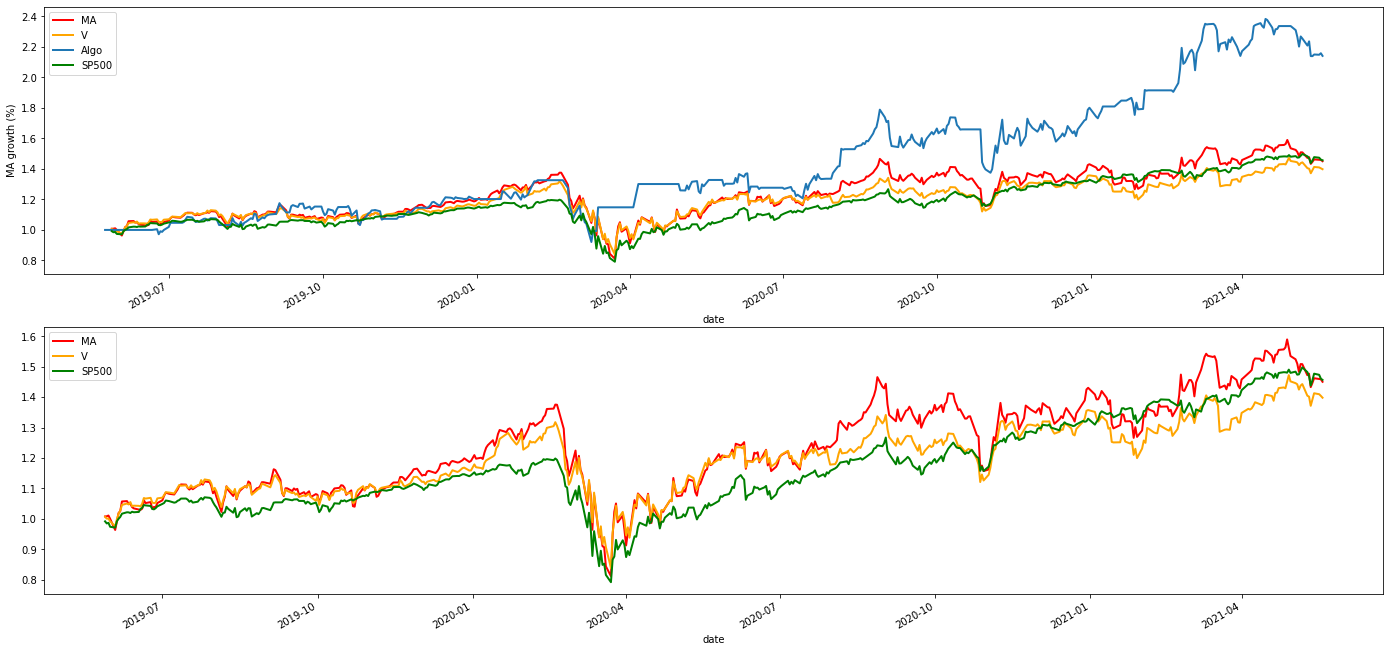

In [ ]:
print("Plotting the performance charts...")
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(211,  ylabel='%s growth (%%)' % symbols[0])
(pairs['%s' % symbols[0]].pct_change()+1.0).cumprod().plot(ax=ax1, color='r', lw=2.)
(pairs['%s' % symbols[1]].pct_change()+1.0).cumprod().plot(ax=ax1, color='orange', lw=2.)

#ax2 = fig.add_subplot(111, ylabel='Portfolio value growth (%%)')
portfolio['returns'].plot(ax=ax1, lw=2.)

#ax3 = fig.add_subplot(111, ylabel = 'SP500Benchmark growth (%%)')
(pairs['^GSPC'].pct_change()+1.0).cumprod().plot(ax=ax1, color='g', lw=2.)
ax1.legend(labels = ['%s' %symbols[0],'%s' %symbols[1], 'Algo', 'SP500'])

ax2 = fig.add_subplot(212)
(pairs['%s' % symbols[0]].pct_change()+1.0).cumprod().plot(ax=ax2, color='r', lw=2.)
(pairs['%s' % symbols[1]].pct_change()+1.0).cumprod().plot(ax=ax2, color='orange', lw=2.)
(pairs['^GSPC'].pct_change()+1.0).cumprod().plot(ax=ax2, color='g', lw=2.)
ax2.legend(labels = ['%s' %symbols[0],'%s' %symbols[1], 'SP500'])
plt.show()

In [ ]:
# Calculate Returns
returns = portfolio['returns'][-1]
# Calcualte Max Returns
maxReturns = max(portfolio['returns'])
# Calculate Min Returns
minReturns = min(portfolio['returns'])
# Calculate Sharpe Ratio
sharpeRatio = portfolio['returns'].mean()/portfolio['returns'].std()
# Calculate maxDrawdown
Roll_Max = portfolio['returns'].cummax()
Drawdown = portfolio['returns']/Roll_Max - 1.0
MaxDrawdown = Drawdown.cummin().min()
# Calulate volatility
volatility = portfolio['returns'].std()

print(f"Returns : {returns:.2f}")
print(f"Max Returns: {maxReturns:.2f}")
print(f"Min Returns: {minReturns:.2f}")
print(f"Sharpe Ratio: {sharpeRatio:.2f}")
print(f"Volatility: {volatility:.2f}")
print(f"Max Drawdown : {MaxDrawdown*100:.2f}%")

Returns : 2.14
Max Returns: 2.38
Min Returns: 0.92
Sharpe Ratio: 3.71
Volatility: 0.39
Max Drawdown : -30.54%


In [ ]:
portfolio

,positions,MA,V,total,returns
date,,,,,
2019-05-24,0.0,-0.000000,0.000000,0.000000,1.000000
2019-05-28,0.0,-0.000000,0.000000,0.000000,1.000000
2019-05-29,0.0,-0.000000,0.000000,0.000000,1.000000
2019-05-30,0.0,-0.000000,0.000000,0.000000,1.000000
2019-05-31,0.0,-0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...
2021-05-13,-1.0,357.050598,-221.863022,135.187576,2.138529
2021-05-14,-1.0,360.908569,-225.036163,135.872406,2.149362
2021-05-17,-1.0,360.303589,-224.540359,135.763229,2.147635


In [ ]:
res = pd.DataFrame(columns = ["entry", "exit", "returns", "maxReturns", "minReturns", "sharpeRatio", "volatility"])

In [ ]:
k = 0
search_range = np.arange(0, 0, 0.05)
for i in search_range:
  for j in search_range:
    symbols = ('MA', 'V')
    pairs = get_relevant_tickers(data, *symbols, "^GSPC")
    pairs = calculate_spread_zscore(pairs, symbols)
    pairs = create_long_short_market_signals(pairs, symbols, z_entry_threshold=i, z_exit_threshold=j)
    portfolio = create_portfolio_returns(pairs, symbols)

    # Calculate Returns
    returns = portfolio['returns'][-1]
    # Calcualte Max Returns
    maxReturns = max(portfolio['returns'])
    # Calculate Min Returns
    minReturns = min(portfolio['returns'])
    if minReturns < 0.5:
      continue
    # Calculate Sharpe Ratio
    sharpeRatio = portfolio['returns'].mean()/portfolio['returns'].std()
    # Calculate maxDrawdown

    # Calulate volatility
    volatility = portfolio['returns'].std()
    
    res.loc[k,'entry'] = i
    res.loc[k,'exit'] = j
    res.loc[k,'returns'] = returns
    res.loc[k,'maxReturns'] = maxReturns
    res.loc[k,'minReturns'] = minReturns
    res.loc[k,'sharpeRatio'] = sharpeRatio
    res.loc[k,'volatility'] = volatility
    k += 1

In [ ]:
res.to_csv('log.csv')

Fitting the rolling Linear Regression...
Creating the spread/zscore columns...
Calculating when to be in the market (long and short)...
Constructing a portfolio...
Constructing the equity curve...
Plotting the performance charts...


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


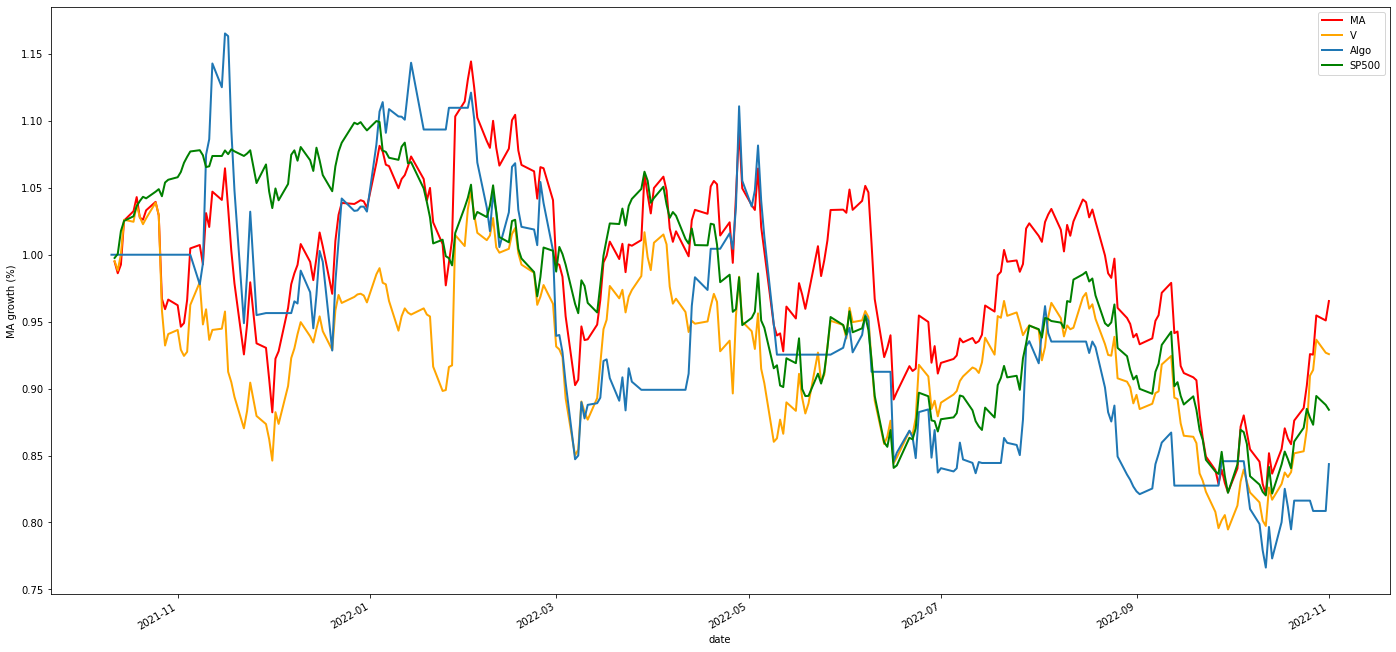

Returns : 0.84
Max Returns: 1.17
Min Returns: 0.77
Sharpe Ratio: 10.21
Volatility: 0.09
Max Drawdown : -34.24%


In [ ]:
#test params on test set
symbols = ('MA', 'V')
entry_threshold = 0.95
exit_threshold = 0.85
test_pair = get_relevant_tickers(test, *symbols, "^GSPC")
test_pair = calculate_spread_zscore(test_pair, symbols)
test_pair = create_long_short_market_signals(test_pair, symbols, z_entry_threshold = entry_threshold, z_exit_threshold = exit_threshold)
test_portfolio = create_portfolio_returns(test_pair, symbols)

print("Plotting the performance charts...")
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(111,  ylabel='%s growth (%%)' % symbols[0])
(test_pair['%s' % symbols[0]].pct_change()+1.0).cumprod().plot(ax=ax1, color='r', lw=2.)
(test_pair['%s' % symbols[1]].pct_change()+1.0).cumprod().plot(ax=ax1, color='orange', lw=2.)

#ax2 = fig.add_subplot(111, ylabel='Portfolio value growth (%%)')
test_portfolio['returns'].plot(ax=ax1, lw=2.)

#ax3 = fig.add_subplot(111, ylabel = 'SP500Benchmark growth (%%)')
(test_pair['^GSPC'].pct_change()+1.0).cumprod().plot(ax=ax1, color='g', lw=2.)
ax1.legend(labels = ['%s' %symbols[0],'%s' %symbols[1], 'Algo', 'SP500'])
plt.show()

# Calculate Returns
returns = test_portfolio['returns'][-1]
# Calcualte Max Returns
maxReturns = max(test_portfolio['returns'])
# Calculate Min Returns
minReturns = min(test_portfolio['returns'])
# Calculate Sharpe Ratio
sharpeRatio = test_portfolio['returns'].mean()/test_portfolio['returns'].std()
# Calculate maxDrawdown
Roll_Max = test_portfolio['returns'].cummax()
Drawdown = test_portfolio['returns']/Roll_Max - 1.0
MaxDrawdown = Drawdown.cummin().min()
# Calulate volatility
volatility = test_portfolio['returns'].std()

print(f"Returns : {returns:.2f}")
print(f"Max Returns: {maxReturns:.2f}")
print(f"Min Returns: {minReturns:.2f}")
print(f"Sharpe Ratio: {sharpeRatio:.2f}")
print(f"Volatility: {volatility:.2f}")
print(f"Max Drawdown : {MaxDrawdown*100:.2f}%")